In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

### Exploring Dataset

In [39]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [40]:
print('x - Train  Shape:      ', x_train.shape)
print('y - Train  Shape:      ', y_train.shape)

print('\nx - Test  Shape:       ', x_test.shape)
print('y - Test  Shape:       ', y_test.shape)

x - Train  Shape:       (50000, 32, 32, 3)
y - Train  Shape:       (50000, 1)

x - Test  Shape:        (10000, 32, 32, 3)
y - Test  Shape:        (10000, 1)


In [41]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Class images in Dataset 8x8 plot.

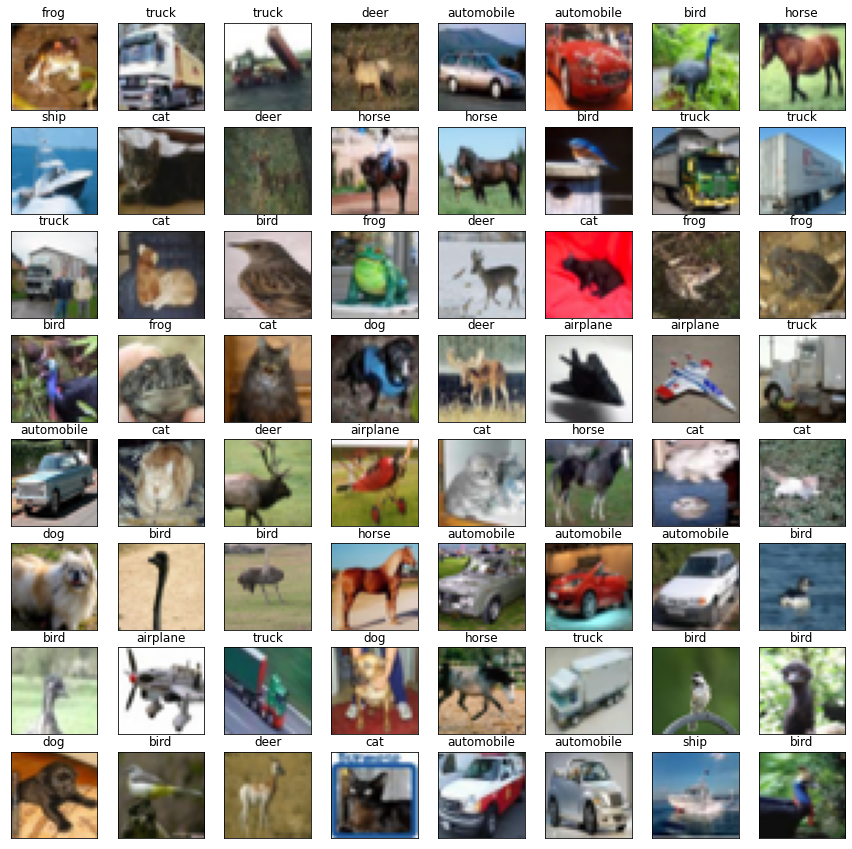

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[y_train[i][0]], fontsize=12)

plt.show()

## Data Preprocessing

* ### Flatten the input image

In [43]:
train_flat = x_train.reshape((x_train.shape[0], -1))
test_flat = x_test.reshape((x_test.shape[0], -1))

In [44]:
train_flat

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

In [45]:
test_flat

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=uint8)

* ### Normalize the image pixel values (divide by 255)

In [46]:
train_flat = train_flat.astype('float32')
test_flat= test_flat.astype('float32')

normalize_train = train_flat/255.0
normalize_test = test_flat/255.0

In [47]:
normalize_train

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [48]:
normalize_test

array([[0.61960787, 0.4392157 , 0.19215687, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.7294118 , 0.78431374,
        0.78039217],
       [0.61960787, 0.74509805, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843138, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843138,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078432, 0.47058824,
        0.3137255 ],
       [0.28627452, 0.30588236, 0.29411766, ..., 0.10588235, 0.10196079,
        0.10196079]], dtype=float32)

* ### One-Hot Encode the categorical column


In [49]:
y_train_ohe = keras.utils.to_categorical(y_train,len(np.unique(classes)))
y_test_ohe = keras.utils.to_categorical(y_test,len(np.unique(classes)))

In [50]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

* ### Build a model architecture (Sequential) with Dense layers(Fully connected layers)

In [52]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* ### Train the model and make predictions

In [53]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [54]:
history = model.fit(normalize_train, y_train_ohe, epochs=50, batch_size=500, validation_split=0.1)

Epoch 1/50
90/90 [==============================] - 9s 77ms/step - loss: 2.0030 - accuracy: 0.2749 - val_loss: 1.8343 - val_accuracy: 0.3570
Epoch 2/50
90/90 [==============================] - 6s 70ms/step - loss: 1.7845 - accuracy: 0.3604 - val_loss: 1.7892 - val_accuracy: 0.3666
Epoch 3/50
90/90 [==============================] - 6s 68ms/step - loss: 1.6878 - accuracy: 0.3957 - val_loss: 1.6448 - val_accuracy: 0.4240
Epoch 4/50
90/90 [==============================] - 6s 68ms/step - loss: 1.6085 - accuracy: 0.4261 - val_loss: 1.6461 - val_accuracy: 0.4050
Epoch 5/50
90/90 [==============================] - 6s 64ms/step - loss: 1.5609 - accuracy: 0.4399 - val_loss: 1.5809 - val_accuracy: 0.4404
Epoch 6/50
90/90 [==============================] - 6s 69ms/step - loss: 1.5178 - accuracy: 0.4588 - val_loss: 1.5488 - val_accuracy: 0.4438
Epoch 7/50
90/90 [==============================] - 7s 81ms/step - loss: 1.4871 - accuracy: 0.4709 - val_loss: 1.4990 - val_accuracy: 0.4658
Epoch 8/50
90

In [55]:
test_loss, test_acc = model.evaluate(normalize_test,y_test_ohe, verbose=2)
print("Test Accuracy : ", round(test_acc,3)*100, "%")

313/313 - 1s - loss: 1.6068 - accuracy: 0.5246 - 1s/epoch - 5ms/step
Test Accuracy :  52.5 %


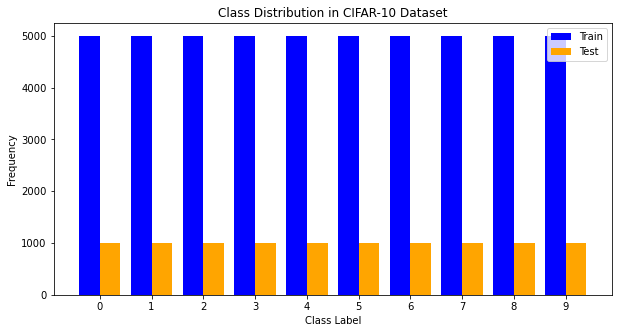

In [56]:
num_classes = len(np.unique(y_train))

train_label_counts = np.bincount(y_train.flatten(), minlength=num_classes)

test_label_counts = np.bincount(y_test.flatten(), minlength=num_classes)

plt.figure(figsize=(10, 5))
plt.bar(np.arange(num_classes) - 0.2, train_label_counts, width=0.4, label='Train', color='blue')
plt.bar(np.arange(num_classes) + 0.2, test_label_counts, width=0.4, label='Test', color='orange')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution in CIFAR-10 Dataset')
plt.xticks(np.arange(num_classes), np.arange(num_classes))
plt.legend()
plt.show()

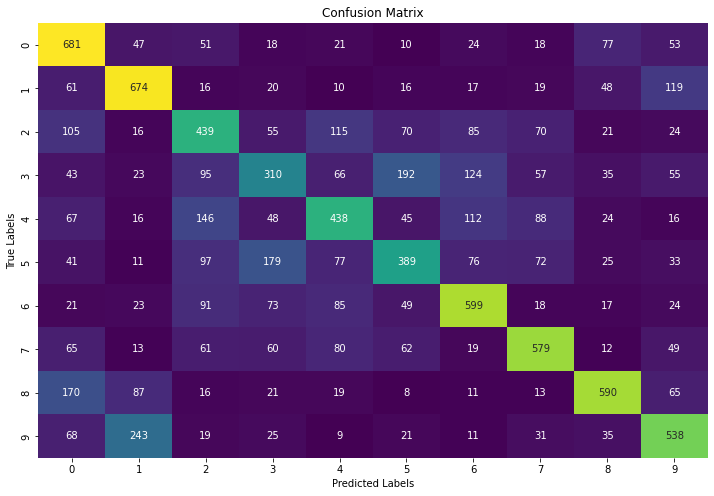

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Random number is  3099


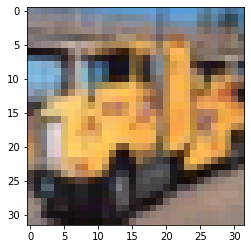

Actual animal is  ['truck']
1/1 [==============================] - 0s 37ms/step
Predicted animal is  truck


In [61]:
import random

i = random.randint(1,10000)
print("Random number is ", i)
plt.imshow(x_test[i].reshape(32, 32, 3), cmap='gray')
plt.show()
class_names = np.array(classes)
actual = class_names[y_test[i]]
print("Actual animal is ", actual)
print("Predicted animal is ", class_names[model.predict(x_test[i].reshape(1,3072)).argmax()])

In [ ]:
import pickle

model_pkl = "model.pkl"

data = {
    'x_test': x_test,
    'y_test': y_test,
    'model': model
}

with open(pickle_file_nam, 'wb') as f:
    pickle.dump(data, f)

print("Data saved as pickle file:", pickle_file_name)